In [1]:
pip install tensorflow numpy pandas matplotlib opencv-python scikit-learn

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/332.0 MB 7.2 MB/s eta 0:00:46
   ---------------------------------------- 2.9/332.0 MB 7.7 MB/s eta 0:00:43
    --------------------------------------- 4.7/332.0 MB 8.0 MB/s eta 0:00:41
    --------------------------------------- 6.0/332.0 MB 7.3 MB/s eta 0:00:45
    --------------------------------------- 7.3/332.0 MB 7.2 MB/s eta 0:00:46
   - -------------------------------------- 8.7/332.0 MB 7.2 MB/s eta 0:00:46
   - -------------------------------------- 10.0/332.0 MB 6.9 MB/s eta 0:00:47
   - -------------------------------------- 10.7/332.0 MB 6.8 MB/s eta 0:00:47
   - -------------------------------------- 12.3/332.0 MB 6.7 MB/s eta 0:00:49
   - -------------------------------------- 13.9/332.0 MB 6.7 MB/s eta 0:00:48
   - -------------------------------------- 15.5/332.0 MB 6.9 MB/s eta 0:00:47
   -- ------------------------------------- 17.6/332.0 MB 7.1 MB/s

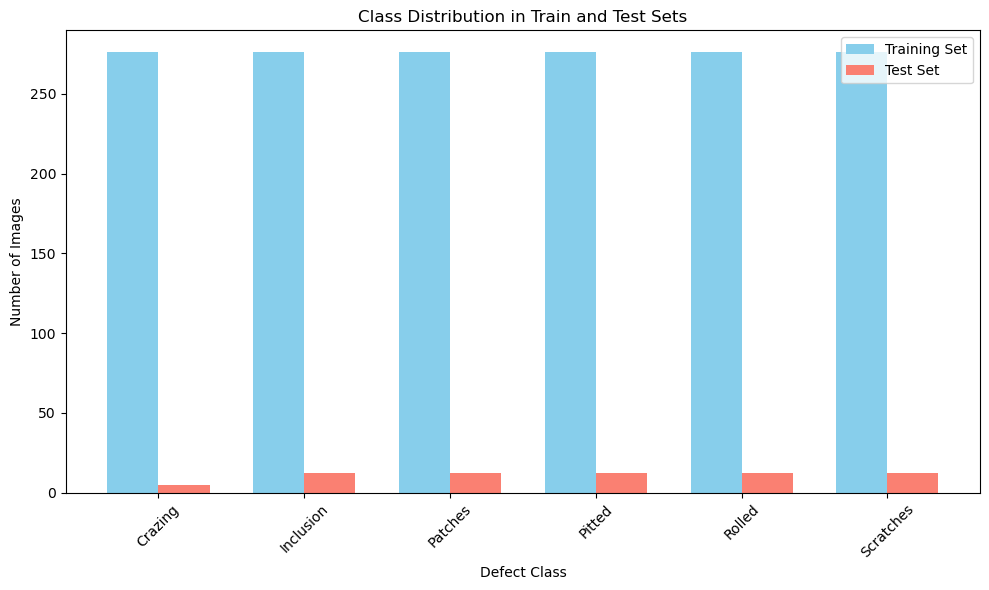

In [13]:
# Count images per class for visualization
def count_images(directory, classes):
    counts = []
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if os.path.exists(class_dir):
            counts.append(len([f for f in os.listdir(class_dir) if f.endswith('.bmp')]))
        else:
            counts.append(0)
    return counts

train_counts = count_images(train_dir, classes)
test_counts = count_images(test_dir, classes)

# Plot class distribution using Matplotlib
plt.figure(figsize=(10, 6))
x = np.arange(len(classes))
width = 0.35

plt.bar(x - width/2, train_counts, width, label='Training Set', color='skyblue')
plt.bar(x + width/2, test_counts, width, label='Test Set', color='salmon')
plt.xlabel('Defect Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Train and Test Sets')
plt.xticks(x, classes, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\vemul\AppData\Local\Temp\ipykernel_6740\1169681618.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


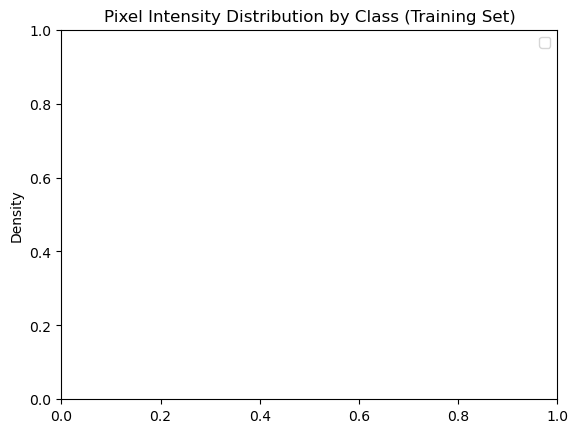


Pixel Intensity Distribution:


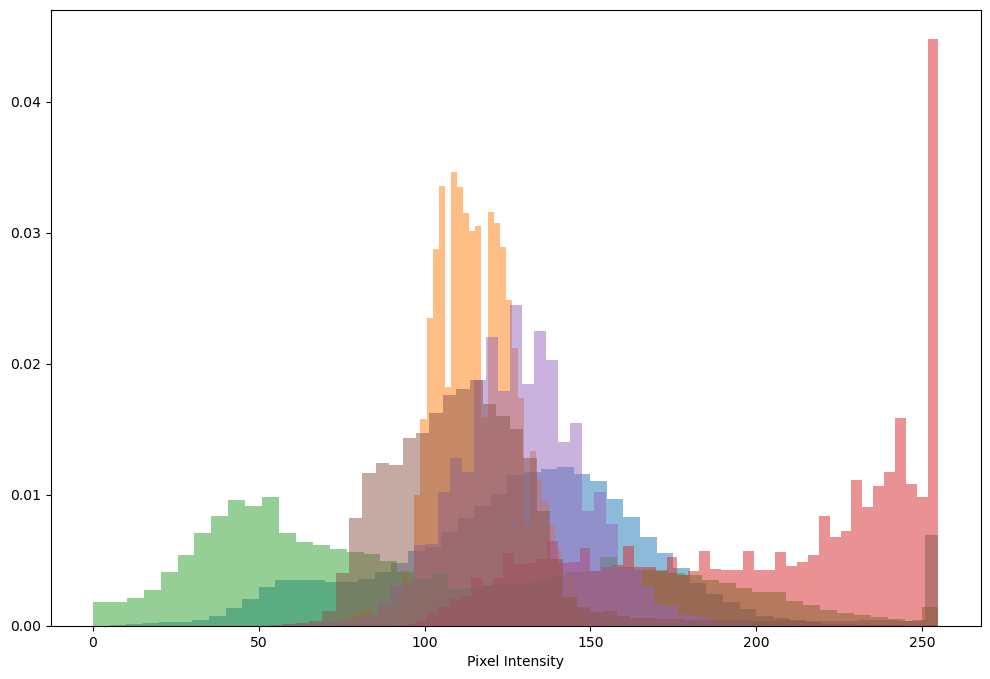

In [16]:
# 3. Pixel Intensity Distribution
def plot_pixel_intensity(directory, classes, num_samples=5):
    plt.figure(figsize=(12, 8))
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if not os.path.exists(class_dir):
            continue
        img_files = [f for f in os.listdir(class_dir) if f.endswith('.bmp')][:num_samples]
        intensities = []
        for img_name in img_files:
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            intensities.extend(img.flatten())
        plt.hist(intensities, bins=50, alpha=0.5, label=class_name, density=True)
    plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.title('Pixel Intensity Distribution by Class (Training Set)')
plt.legend()
plt.show()

print("\nPixel Intensity Distribution:")
plot_pixel_intensity(train_dir, classes)

In [4]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Define paths
data_dir = r'C:\Users\vemul\Defect_Detection_Project\NEU_Metal_Surface_Defects_Data'  # Update if needed
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
classes = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
img_size = (200, 200)

# Function to load images from a directory
def load_images_from_dir(directory, classes):
    images = []
    labels = []
    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        if not os.path.exists(class_dir):
            print(f"Warning: Directory not found for class {class_name}: {class_dir}")
            continue
        for img_name in os.listdir(class_dir):
            if img_name.endswith('.bmp'):
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Warning: Failed to load image: {img_path}")
                    continue
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(class_idx)
    return np.array(images), np.array(labels)

# Load training and test data
print("Loading training data...")
X_train, y_train = load_images_from_dir(train_dir, classes)
print("Loading test data...")
X_test, y_test = load_images_from_dir(test_dir, classes)

# Check if data was loaded
if X_train.size == 0 or X_test.size == 0:
    raise ValueError("No images were loaded. Check dataset path and contents.")

# Reshape and normalize
X_train = X_train.reshape(-1, img_size[0], img_size[1], 1) / 255.0
X_test = X_test.reshape(-1, img_size[0], img_size[1], 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=len(classes))
y_test = to_categorical(y_test, num_classes=len(classes))

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Loading training data...
Loading test data...
Training set: (1656, 200, 200, 1), Test set: (65, 200, 200, 1)


In [5]:
print(os.path.exists(train_dir), os.listdir(train_dir))  # Should list ['Crazing', 'Inclusion', ...]
print(os.path.exists(test_dir), os.listdir(test_dir))    # Should list ['Crazing', 'Inclusion', ...]

True ['Crazing', 'Inclusion', 'labels', 'Patches', 'Pitted', 'Rolled', 'Scratches']
True ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


C:\Users\vemul\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,667,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,760,710 (33.42 MB)

 Trainable params: 8,760,710 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\vemul\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 47s 844ms/step - accuracy: 0.2524 - loss: 1.7487 - val_accuracy: 0.1846 - val_loss: 1.8835
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 44s 841ms/step - accuracy: 0.3412 - loss: 1.5517 - val_accuracy: 0.4923 - val_loss: 1.3272
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 44s 843ms/step - accuracy: 0.4595 - loss: 1.3425 - val_accuracy: 0.6769 - val_loss: 1.0175
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 44s 853ms/step - accuracy: 0.6045 - loss: 1.0367 - val_accuracy: 0.6769 - val_loss: 0.8859
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 45s 873ms/step - accuracy: 0.7633 - loss: 0.6900 - val_accuracy: 0.6308 - val_loss: 0.9277
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 45s 860ms/step - accuracy: 0.7663 - loss: 0.6769 - val_accuracy: 0.6923 - val_loss: 0.8084
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 44s 845ms/step - accuracy: 0.8176 - loss: 0.5260 - val_accuracy: 0.5385 - val_loss: 1.1894
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 45s 862ms/step - accuracy: 0.7784 - loss: 0.6005 - val_accu

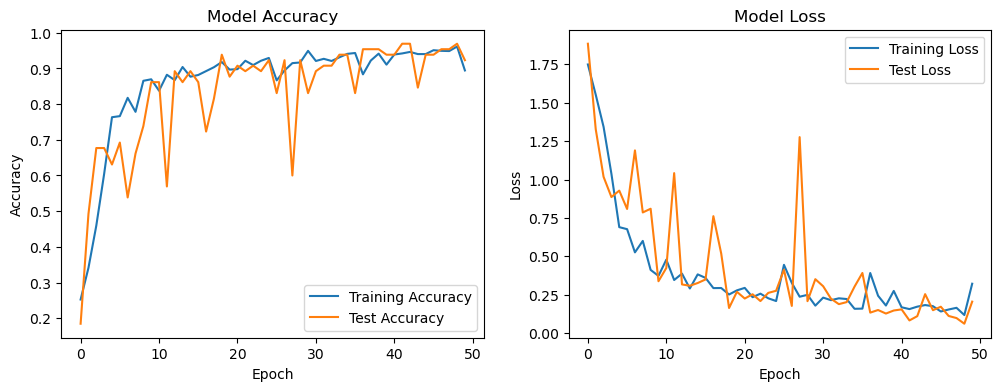

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Data augmentation for training
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the model
model.save('metal_surface_defect_model.h5')

In [8]:
def predict_defect(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Failed to load image: {image_path}")
    img = cv2.resize(img, img_size)
    img = img.reshape(1, img_size[0], img_size[1], 1) / 255.0
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    return classes[class_idx]

# Example usage
sample_image = r'C:\Users\vemul\Defect_Detection_Project\NEU_Metal_Surface_Defects_Data\test\Crazing\Cr_105.bmp'
print(f"Predicted defect: {predict_defect(sample_image, model)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Predicted defect: Crazing



Pixel Intensity Distribution:
Crazing: 200000 pixels, Range: [5, 255]
Inclusion: 200000 pixels, Range: [73, 165]
Patches: 200000 pixels, Range: [0, 255]
Pitted: 200000 pixels, Range: [91, 255]
Rolled: 200000 pixels, Range: [46, 227]
Scratches: 200000 pixels, Range: [53, 255]


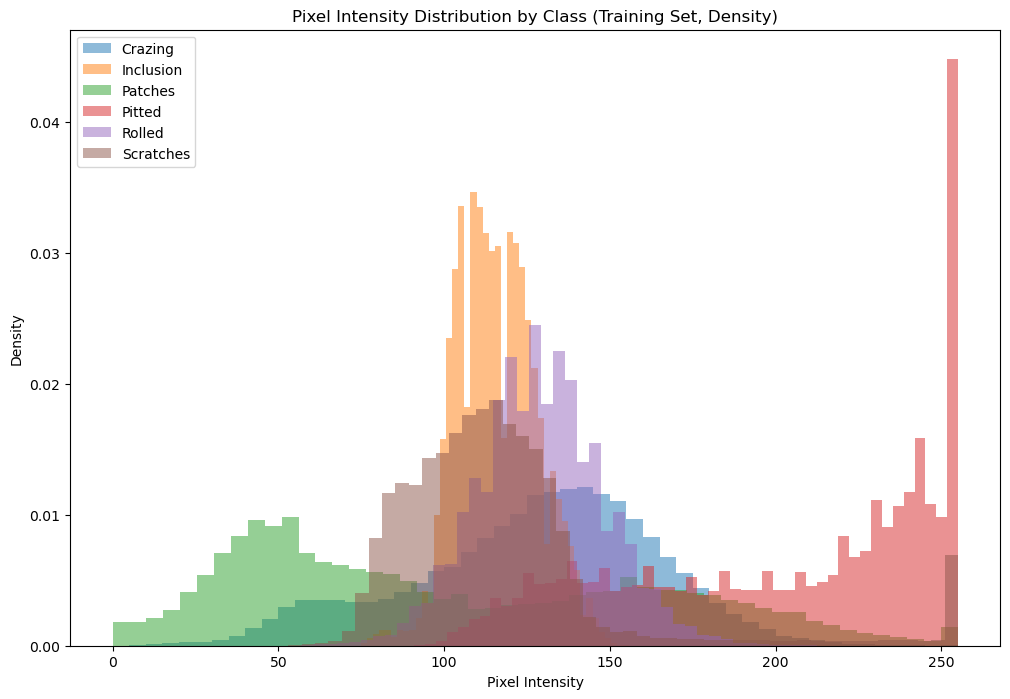

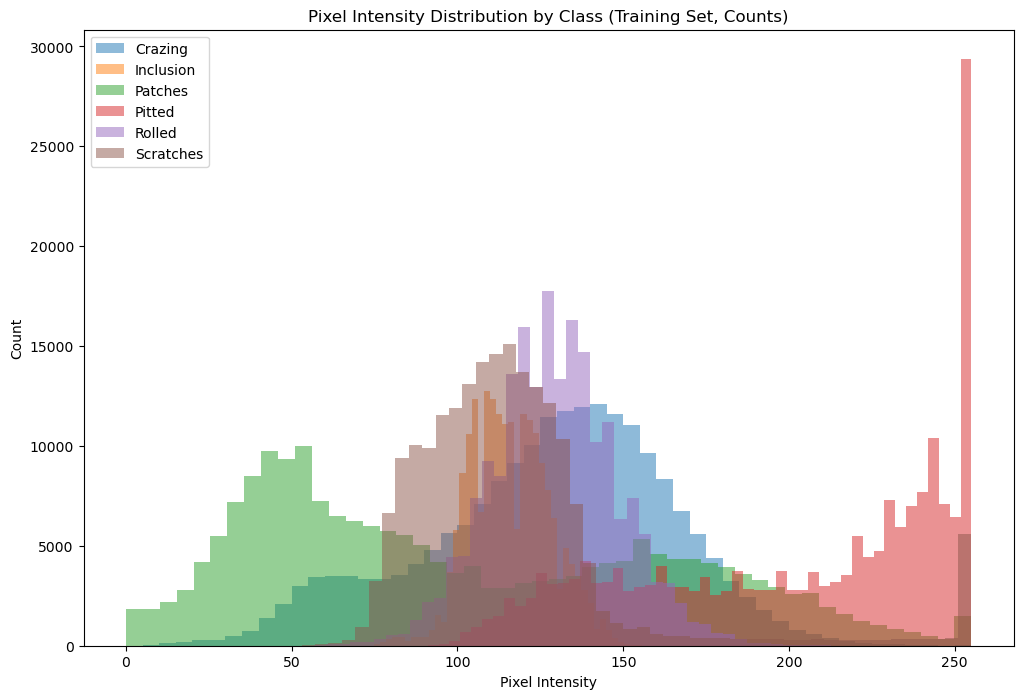

In [21]:

# Pixel Intensity Distribution (Density and Counts)
def plot_pixel_intensity(directory, classes, num_samples=5):
    # Plot 1: Density Histogram
    plt.figure(figsize=(12, 8))
    all_intensities_valid = True
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if not os.path.exists(class_dir):
            print(f"Warning: Directory not found for class {class_name}: {class_dir}")
            continue
        img_files = [f for f in os.listdir(class_dir) if f.endswith('.bmp')][:num_samples]
        if not img_files:
            print(f"No .bmp files found in {class_dir}")
            continue
        intensities = []
        for img_name in img_files:
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            intensities.extend(img.flatten())
        if not intensities:
            print(f"No intensities collected for {class_name}")
            all_intensities_valid = False
            continue
        intensities = np.array(intensities)
        print(f"{class_name}: {len(intensities)} pixels, Range: [{intensities.min()}, {intensities.max()}]")
        plt.hist(intensities, bins=50, alpha=0.5, label=class_name, density=True)
    if not all_intensities_valid:
        print("Warning: Some classes have no valid intensity data, plot may be incomplete")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Density')
    plt.title('Pixel Intensity Distribution by Class (Training Set, Density)')
    plt.legend()
    plt.show()

    # Plot 2: Count Histogram
    plt.figure(figsize=(12, 8))
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if not os.path.exists(class_dir):
            continue
        img_files = [f for f in os.listdir(class_dir) if f.endswith('.bmp')][:num_samples]
        intensities = []
        for img_name in img_files:
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            intensities.extend(img.flatten())
        if intensities:
            plt.hist(intensities, bins=50, alpha=0.5, label=class_name, density=False)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Count')
    plt.title('Pixel Intensity Distribution by Class (Training Set, Counts)')
    plt.legend()
    plt.show()

print("\nPixel Intensity Distribution:")
plot_pixel_intensity(train_dir, classes, num_samples=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


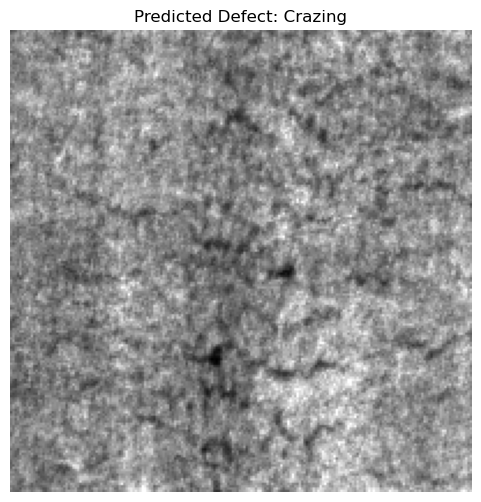

Predicted defect: Crazing


In [30]:
# 5. Predict and Visualize
def predict_defect(image_path, model, classes, img_size):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Failed to load image: {image_path}")
    
    img_resized = cv2.resize(img, img_size)
    img_input = img_resized.reshape(1, img_size[0], img_size[1], 1) / 255.0
    prediction = model.predict(img_input)
    class_idx = np.argmax(prediction)
    predicted_class = classes[class_idx]
    
    # Display image without bounding box (no annotations available)
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Defect: {predicted_class}")
    plt.axis('off')
    plt.show()
    
    return predicted_class

# Example usage
sample_image = r'C:\Users\vemul\Defect_Detection_Project\NEU_Metal_Surface_Defects_Data\valid\Crazing\Cr_11.bmp'
print(f"Predicted defect: {predict_defect(sample_image, model, classes, img_size)}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Classification Report:
              precision    recall  f1-score   support

     Crazing       0.71      1.00      0.83         5
   Inclusion       0.86      1.00      0.92        12
     Patches       1.00      0.92      0.96        12
      Pitted       1.00      0.67      0.80        12
      Rolled       0.92      1.00      0.96        12
   Scratches       1.00      1.00      1.00        12

    accuracy                           0.92        65
   macro avg       0.92      0.93      0.91        65
weighted avg       0.94      0.92      0.92        65



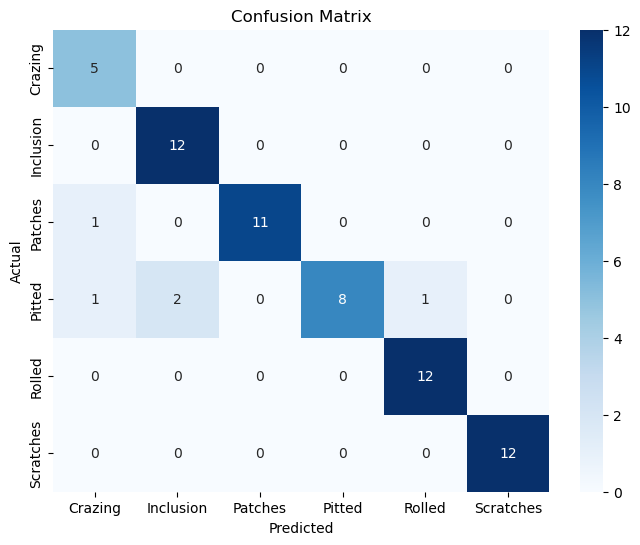

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate and print metrics
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=classes))

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Sample Images from Training Set:


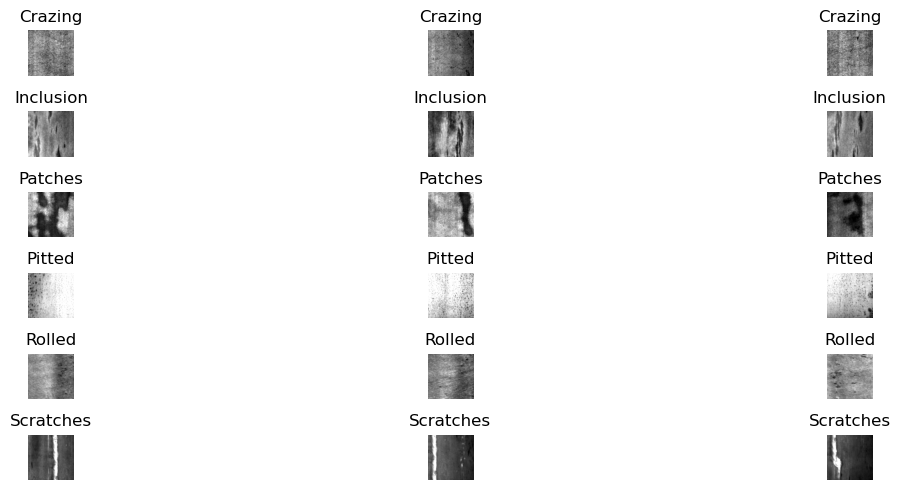

In [15]:
# 2. Sample Image Visualization
def plot_sample_images(directory, classes, num_samples=3):
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        if not os.path.exists(class_dir):
            continue
        img_files = [f for f in os.listdir(class_dir) if f.endswith('.bmp')][:num_samples]
        for j, img_name in enumerate(img_files):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img, cmap='gray')
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

print("\nSample Images from Training Set:")
plot_sample_images(train_dir, classes)


Image Statistics (Training Set):
       Class        Mean        Std
0    Crazing  142.358399  28.976520
1  Inclusion  107.438113  13.155910
2    Patches  132.620344  54.213648
3     Pitted  177.014242  26.677874
4     Rolled  117.758702  15.845262
5  Scratches   93.861043  20.972787


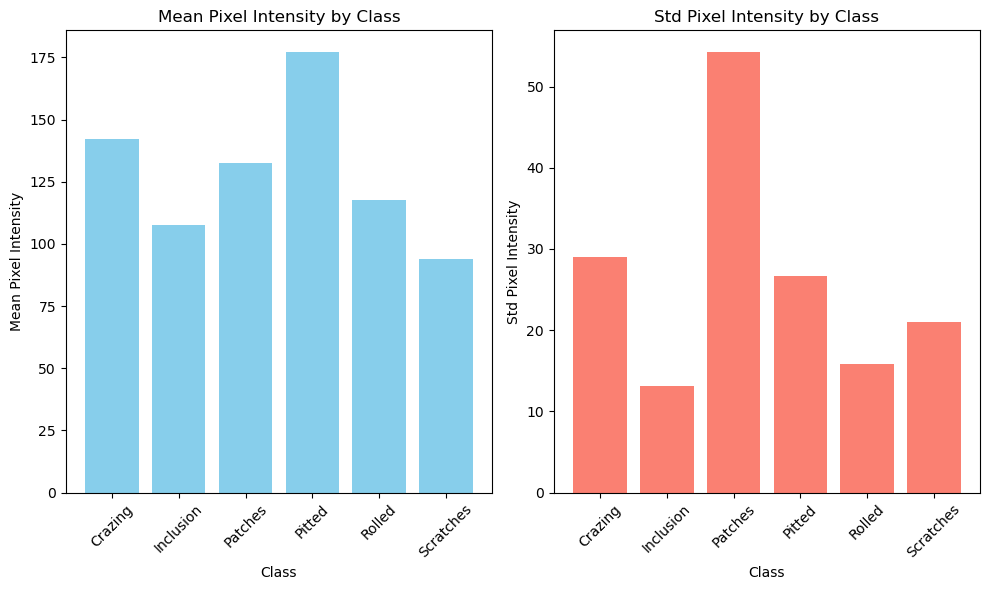

In [19]:
import pandas as pd
# 4. Image Statistics
def compute_image_stats(directory, classes):
    stats = {'Class': [], 'Mean': [], 'Std': []}
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if not os.path.exists(class_dir):
            continue
        mean_intensities = []
        std_intensities = []
        for img_name in os.listdir(class_dir):
            if img_name.endswith('.bmp'):
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                mean_intensities.append(np.mean(img))
                std_intensities.append(np.std(img))
        stats['Class'].append(class_name)
        stats['Mean'].append(np.mean(mean_intensities))
        stats['Std'].append(np.mean(std_intensities))
    return pd.DataFrame(stats)

train_stats = compute_image_stats(train_dir, classes)
print("\nImage Statistics (Training Set):")
print(train_stats)

# Plot image statistics
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(train_stats['Class'], train_stats['Mean'], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Mean Pixel Intensity')
plt.title('Mean Pixel Intensity by Class')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(train_stats['Class'], train_stats['Std'], color='salmon')
plt.xlabel('Class')
plt.ylabel('Std Pixel Intensity')
plt.title('Std Pixel Intensity by Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# 5. Image Size and Format Check
def check_image_sizes(directory, classes, num_samples=10):
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if not os.path.exists(class_dir):
            print(f"Warning: Directory not found for class {class_name}: {class_dir}")
            continue
        img_files = [f for f in os.listdir(class_dir) if f.endswith('.bmp')][:num_samples]
        print(f"\nChecking {class_name}:")
        for img_name in img_files:
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Failed to load: {img_path}")
                continue
            print(f"{img_name}: Shape={img.shape}, Dtype={img.dtype}")

print("\nImage Size and Format Check (Training Set):")
check_image_sizes(train_dir, classes)


Image Size and Format Check (Training Set):

Checking Crazing:
Cr_120.bmp: Shape=(200, 200), Dtype=uint8
Cr_121.bmp: Shape=(200, 200), Dtype=uint8
Cr_122.bmp: Shape=(200, 200), Dtype=uint8
Cr_123.bmp: Shape=(200, 200), Dtype=uint8
Cr_124.bmp: Shape=(200, 200), Dtype=uint8
Cr_125.bmp: Shape=(200, 200), Dtype=uint8
Cr_126.bmp: Shape=(200, 200), Dtype=uint8
Cr_127.bmp: Shape=(200, 200), Dtype=uint8
Cr_128.bmp: Shape=(200, 200), Dtype=uint8
Cr_129.bmp: Shape=(200, 200), Dtype=uint8

Checking Inclusion:
In_120.bmp: Shape=(200, 200), Dtype=uint8
In_121.bmp: Shape=(200, 200), Dtype=uint8
In_122.bmp: Shape=(200, 200), Dtype=uint8
In_123.bmp: Shape=(200, 200), Dtype=uint8
In_124.bmp: Shape=(200, 200), Dtype=uint8
In_125.bmp: Shape=(200, 200), Dtype=uint8
In_126.bmp: Shape=(200, 200), Dtype=uint8
In_127.bmp: Shape=(200, 200), Dtype=uint8
In_128.bmp: Shape=(200, 200), Dtype=uint8
In_129.bmp: Shape=(200, 200), Dtype=uint8

Checking Patches:
Pa_120.bmp: Shape=(200, 200), Dtype=uint8
Pa_121.bmp: Sh